In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#Extracting information about conferences on Education 
#that took place between 01-jan-2012 and 01-jan-2017
#link used for web scraping 
#http://www.allconferences.com/search/index/Category__parent_id:15474/Conference__start_date__from:01-01-2019/Conference__start_date__to:01-01-2020/showLastConference:1/page:1/
#pages-1,2,3

pages = []
conf_name = []
conf_date = []
for i in range(1, 6):
    url = 'http://www.allconferences.com/search/index/Category__parent_id:20483/Conference__start_date__from:01-01-2012/Conference__start_date__to:01-01-2017/showLastConference:1/' + str(i) + '/'
    pages.append(url)
    
for page in pages: 
    #collecting the first page of conferences and creating a beautiful soup object
    page = requests.get(page)
    soup = BeautifulSoup(page.text, 'html.parser')

    #Extracting the text form the webpage from the div element with class categories_conferences
    C_list = soup.find(id ='categories_conferences')

    #Removing the links and Superfluous Data from the text
    last_links_1 = soup.find(class_='order_option')
    last_links_1.decompose()
    last_links_2 = soup.find(class_='pager')
    last_links_2.decompose()
    last_links_3 = soup.find(id='categoryViewFormEmptList')
    last_links_3.decompose()

    #extracting text from all the instances of h2 tag within the div element
    list_items = C_list.find_all('h2')

    for x in list_items:
        names = x.a.text
        conf_name.append(names)
        print(names)

    list_items_date = C_list.find_all('span')
    
    for k in list_items_date:
        date = k.contents[1].strip()
        conf_date.append(date)
        print(date)
        print(conf_name)

Anger Management Specialist-I Certification Seminar, NYC, July 17  18, 2013
Anger Management Specialist-I Certification Seminar, NYC
Anger Management Specialist-I Certification 2-day Seminar, Washington, DC
International Conference on E-Learning in the Workplace 2013
Anger Management Specialist-I Certification Seminar, Tucson, AZ
5th International Online Language Conference
The Creativity Workshop in Barcelona
The Creativity Workshop in Florence
The Creativity Workshop in Prague
Theatre Between Tradition  Contemporaneity
The Creativity Workshop in Dubai
Network Security Workshop
The Creativity Workshop in Singapore
IADIS International Conference Cognition and Exploratory Learning in Digital Age 2013
40th Annual PNEG Conference on Professional Nursing Education and Development
World Conference on Science and Technology Education
ARES-IND 2013 - INDUSTRIAL TRACK at the Eighth International ARES Conference
Serious Games  Social Connect 2013
3rd Annual International Conference on Education

In [5]:
while("" in conf_date) : 
    conf_date.remove("")
print(conf_date)

['May 16, 2014 04:30 PM', 'Mar 19, 2014 04:30 PM', 'Jun 14, 2013', 'Nov 29, 2012', 'Nov 18, 2012', 'Dec 21, 2013', 'Nov 22, 2013 06:00 PM', 'Oct 24, 2013', 'Oct 20, 2013', 'Oct 03, 2013', 'Sep 06, 2013', 'Aug 28, 2013 06:00 PM', 'Aug 27, 2013']


In [6]:
#Grouping the conferences by month

s = pd.to_datetime(pd.Series(conf_date), format='%b %d, %Y',errors="coerce")
s.index = s.dt.to_period('m')
s = s.groupby(level=0).size()

s = s.reindex(pd.period_range(s.index.min(), s.index.max(), freq='m'), fill_value=0)

#Printing the count of conferences that took place in each month
print (s)

2012-11    2
2012-12    0
2013-01    0
2013-02    0
2013-03    0
2013-04    0
2013-05    0
2013-06    1
2013-07    0
2013-08    1
2013-09    1
2013-10    3
2013-11    0
2013-12    1
Freq: M, dtype: int64


In [7]:
s.plot.bar(title='Conferences 2012-2017')

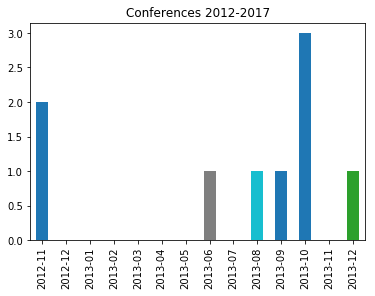

In [8]:
s.plot.bar(title='Conferences 2012-2017')



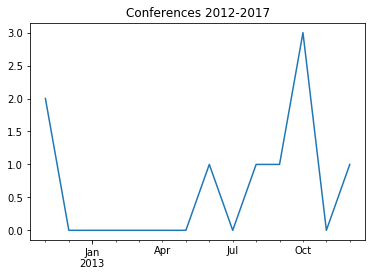

In [9]:
s.plot.line(title='Conferences 2012-2017')